In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists



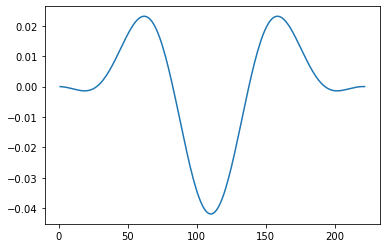

In [3]:
champ = np.genfromtxt("champ.dat")
plt.plot(champ[:,0],champ[:,1])

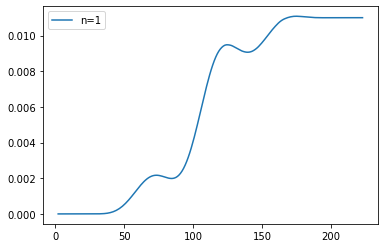

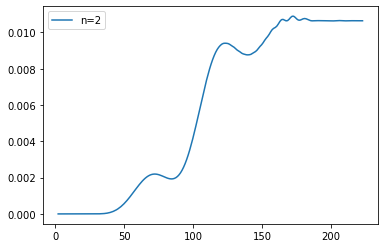

3: le fichier Proba_ionisation_canal00003.dat n existe pas


In [4]:
n = 1
datab = []
while True:
    if n<10:
        debutfichier = "Proba_ionisation_canal0000"
    elif n<100:
        debutfichier = "Proba_ionisation_canal000"
    elif n<1000:
        debutfichier = "Proba_ionisation_canal00"
    elif n<10000:
        debutfichier = "Proba_ionisation_canal0"
    if exists(debutfichier+str(n)+".dat"):
        data = np.genfromtxt(debutfichier+str(n)+".dat")
        datab.append(data)
        plt.plot(data[:,1],data[:,2],label="n="+str(n))
        plt.legend()
        plt.show()
        #plt.close()
    else:
        print(str(n)+": le fichier "+debutfichier+str(n)+".dat n existe pas")
        break
    n=n+1




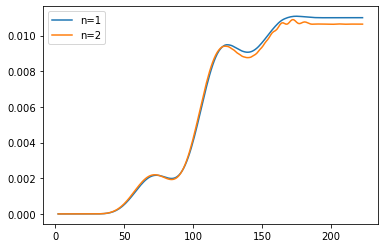

In [5]:
#print(datab[0][:,1])
plt.plot(datab[0][:,1],datab[0][:,2],label="n=1")
plt.plot(datab[1][:,1],datab[1][:,2],label="n=2")
plt.legend()

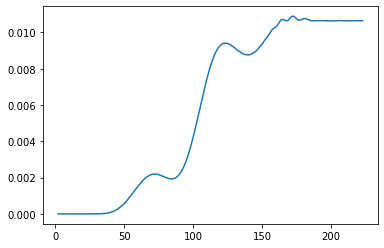

In [6]:
data = np.genfromtxt("Proba_ionisation_canal00002.dat")
plt.plot(data[:,1],data[:,2])


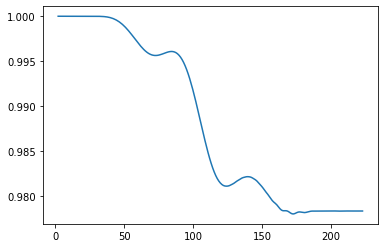

In [7]:
data = np.genfromtxt("Proba_canal_Q00001.dat")
plt.plot(data[:,1],data[:,2])

In [8]:
data = np.genfromtxt("spectre_k_canal00001.dat")

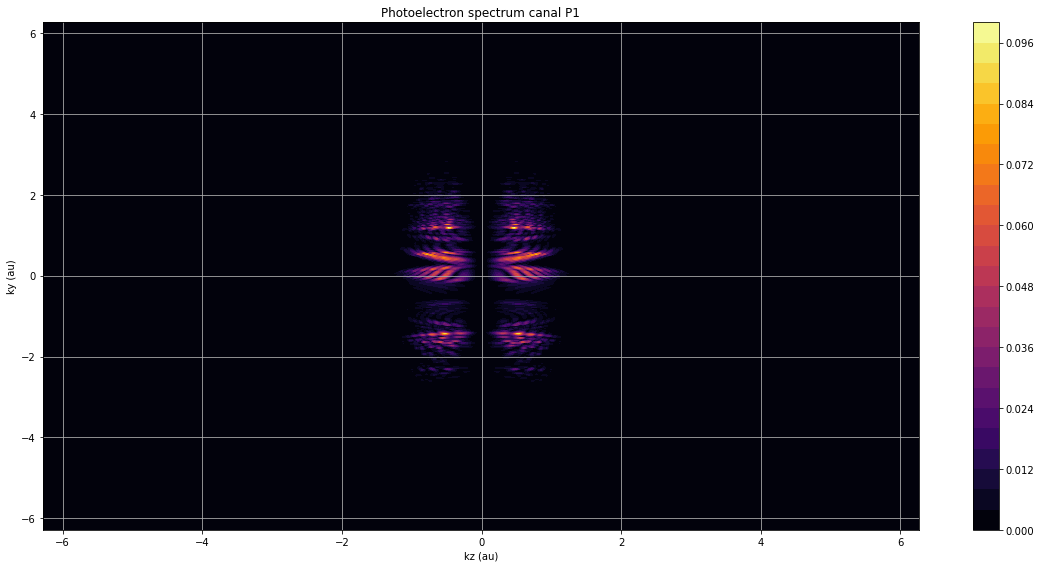

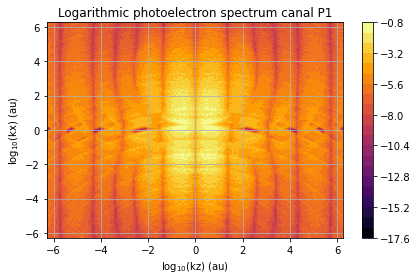

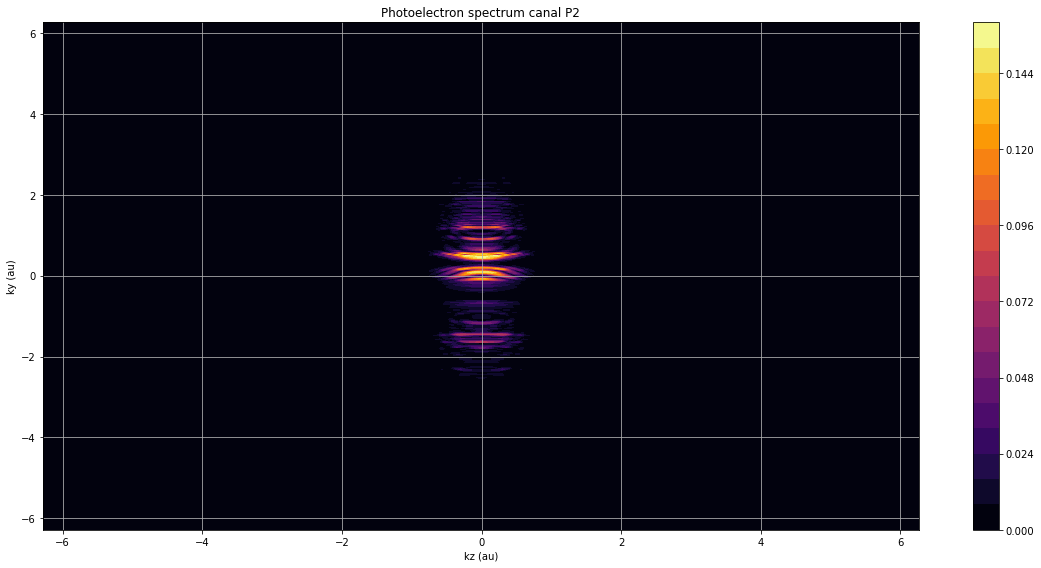

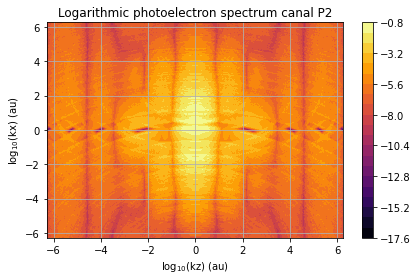

FileNotFoundError: [Errno 2] No such file or directory: 'spectre_k_canal00003.dat'

In [13]:
dimP=2
ny=601
nz=601
#READ DATA
for i in range(dimP):
    ky=[]
    kz=[]
    p=[]
    fr=open('spectre_k_canal%05d.dat'%(i+1),'r')
    lr=fr.readlines()
    fr.close()
    it=0
    for j in range(ny):
        p_t=[]
        for k in range(nz):
            if(k==0):
                #ky.append(np.float64(lr[it][13:26]))
                ky.append(np.float64(lr[it][0:12]))
            if(j==0):
                kz.append(np.float64(lr[it][26:39]))
            if(lr[it][62]=='E'):
                p_t.append(np.float64(lr[it][39:66]))
            else:
                p_t.append(0.E0)
            it=it+1
        p.append(p_t)
    ky=np.array(ky)
    kz=np.array(kz)
    p=np.array(p)
    #MAKE LINEAR FIGURES
    plt.figure(figsize=(16,8))
    plt.contourf(kz,ky,p,levels=25,cmap='inferno')
    plt.colorbar()
    plt.grid()
    plt.title('Photoelectron spectrum canal P%d'%(i+1))
    plt.xlabel('kz (au)')
    plt.ylabel('ky (au)')
    plt.tight_layout()
    plt.savefig('spec_P%05d.png'%(i+1))
    plt.show()
    plt.close()
    #MAKE LOGARITHMIC FIGURES
    plt.figure(figsize=(16,8))
    plt.contourf(kz,ky,np.log10(p),levels=25,cmap='inferno')
    plt.colorbar()
    plt.grid()
    plt.title('Logarithmic photoelectron spectrum canal P%d'%(i+1))
    plt.xlabel(r'$\log_{10}$(kz) (au)')
    plt.ylabel(r'$\log_{10}$(kx) (au)')
    plt.tight_layout()
    plt.savefig('spec_log_P%05d.png'%(i+1))
    plt.show()
    plt.close()
#print(p)
#print(ky)